In [ ]:
# Warmup 0
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os
import copy

In [ ]:
# Warmup 1: Open a connection, define the qry function, and save all of the movies
#           data to a dataframe called "movies_df"
movies_path = "movies.db"
assert os.path.exists(movies_path)
c = sqlite3.connect(movies_path)

def qry(sql, conn = c):
    return pd.read_sql(sql, conn)

movies_df = qry("""
SELECT *
FROM movies
""")
# movies_df

In [ ]:
# Warmup 2: What are the names and revenues of the top 2 movies by James Gunn?
qry("""

""")

In [ ]:
# Warmup 3: What is the average revenue of movies by Brad Bird?
qry("""

""")

In [ ]:
# Warmup 4: What is the average revenue of movies for each director? Sort your answer from highest to lowest.
qry("""

""")

In [ ]:
# Warmup 5: Of those directors who had more than 3 movies, what is the average revenue
#           of movies for each director? Sort your answer from highest to lowest.
qry("""

""")

In [ ]:
# Warmup 6: Of those directors who had more than 3 movies with ratings above 7.0,
#           what is the average revenue of those movies for each director?
#           Sort your answer from highest to lowest.
qry("""

""")

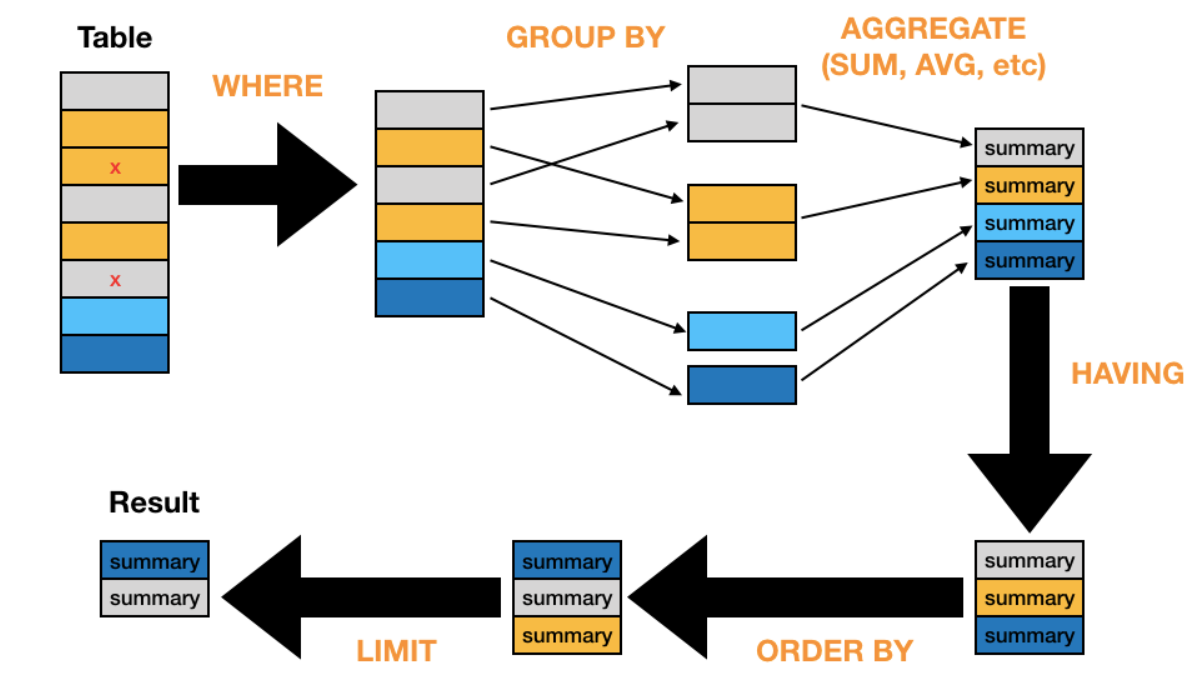

In [ ]:
# Warmup 7: Make a scatter plot where the rating is on the x-axis
#           and the revenue is on the y-axis


In [ ]:
# Warmup 8: What is the correlation between the rating and the revenue?


# Lecture 34: Bar Plots

Learning Objectives:
- Make a bar plot from a Pandas Series
- Add features: x-label, y-label, title, gridlines, color to plot
- Set the index of a DataFrame certain column
- Create an 'other' column in a DataFrame


In [ ]:
# Without this Jupyter notebook cannot display the "first" plot in older versions of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how Matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


In [ ]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for Pandas Plots
# rc stands for runtime config, syntax is like a dictionary

#matplotlib.rcParams                        # show all parameters
#matplotlib.rcParams["font.size"]          # show current font size setting
matplotlib.rcParams["font.size"] = 18   # change current font size setting


## Bar plots: From a Series
The index is the x-label

The values are the height of each bar

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

In [ ]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

# make a bar plot...notice the type


In [ ]:
# if we store the returned object in a variable, we can configure the Axes
# typically the variable name used is 'ax'
ax = s.plot.bar() 
type(ax)

### How can we set the x-axis, y-axis labels, and title?
- use the Axes object

In [ ]:
# better plot:
# instead of 1e6, divide all values in s by 1 million
ax = (s / 1000000).plot.bar()

# give the x ticklabels a rotation of 45 degrees
ax.set_xticklabels(list(s.index), rotation = 45)

# set the y_label to "Dollars (Millions)"
ax.set_ylabel("Dollars (Millions)")

# set the title to "Annual City Spending"
ax.set_title("Annual City Spending")

### How can we change the figure size?
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)



In [ ]:
ax = (s / 1000000).plot.bar(figsize = (1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we make the bars horizontal?
https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html
- switch figsize arguments
- change y-label to x-label

In [ ]:
# paste the previous code cell here and modify


### Change bar color by using the argument color= ' ' 
<pre>
- plot.bar(figsize = (width,height ) , color = ??? )
- 8 standard colors: r, g, b, c, m, y, k, w    color = 'c'  cyan
- can use value of grey between 0 and 1        color = '0.6'
- can use a tuple (r,g,b) between 0 and 1      color = (0, .3, .4)
</pre>

In [ ]:
# color as a single char
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='c')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [ ]:
# color as a value of grey
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='0.5')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [ ]:
# color as tuple of (r,g,b)
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color=(.2, .5, 0))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we mark gridlines?
- use ax.grid()

In [ ]:
# copy the previous code and add grid lines
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='y')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()

## Examples with the Movies Database

In [ ]:
# What happens if we just plot the entire data frame?
movies_df.plot.bar() # Answer: 

In [ ]:
# Let's see that more clearly, plot the first 3 movies


In [ ]:
# How about just the revenue?


In [ ]:
# What is movie 0??? Let's make the title our index (hint: it's unique!)


In [ ]:
# What are revenues of the top 10 revenue movies?


In [ ]:
# Now plot them!


In [ ]:
# Wouldn't it be nice to have an "other" bar to represent other revenue?


In [ ]:
# Add the argument logy=True to show on a logarithmic scale
